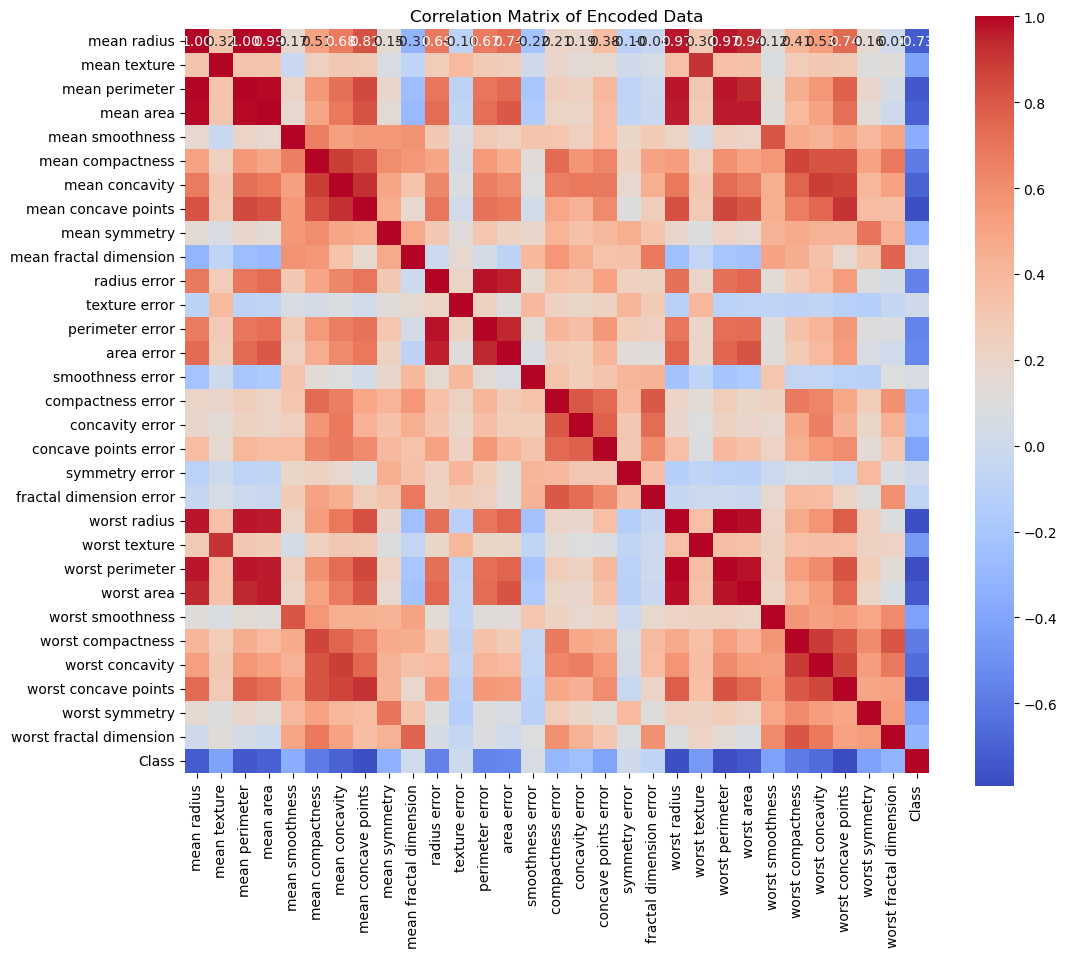

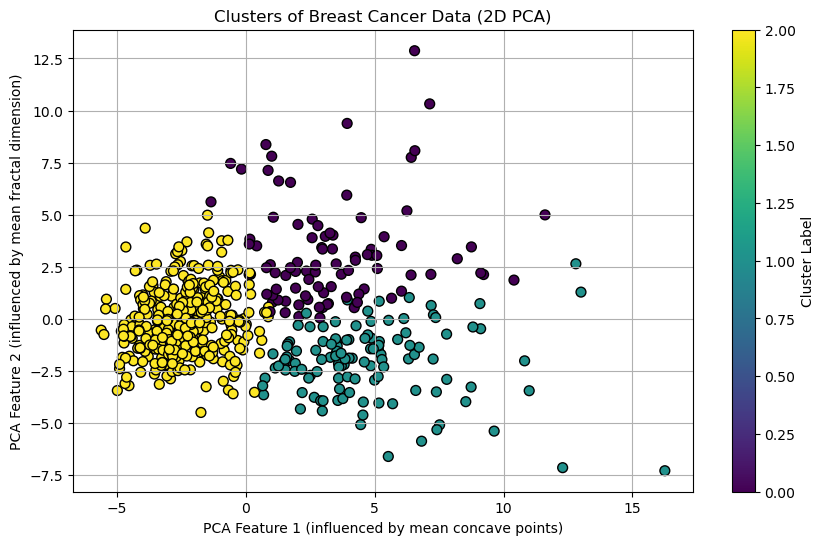

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture

dataset = "sklearn"
if 'learn' in dataset:
    breast_cancer = load_breast_cancer()
    data = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
    data["Class"] = breast_cancer.target

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
else:
    # Load the data
    data_path = 'breast_cancer.csv'  # Update the path if needed
    data = pd.read_csv(data_path)

    # Encode categorical variables
    le = LabelEncoder()
    encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

    # Perform Standard Scaling on encoded data for PCA
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(encoded_data)

# Plotting the correlation matrix of the original encoded data
corr_matrix = pd.DataFrame(scaled_data, columns=data.columns).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Encoded Data')
plt.show()
# Perform K-means clustering
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
components = pca.components_

# Identify the most significant features for each principal component
feature_indices = np.argsort(np.abs(components), axis=1)[:, -1]
most_significant_features = [data.columns[indices] for indices in feature_indices]

# Plotting the clusters with named PCA features
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Clusters of Breast Cancer Data (2D PCA)')
plt.xlabel(f'PCA Feature 1 (influenced by {most_significant_features[0]})')
plt.ylabel(f'PCA Feature 2 (influenced by {most_significant_features[1]})')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()

### hierarchical clustering

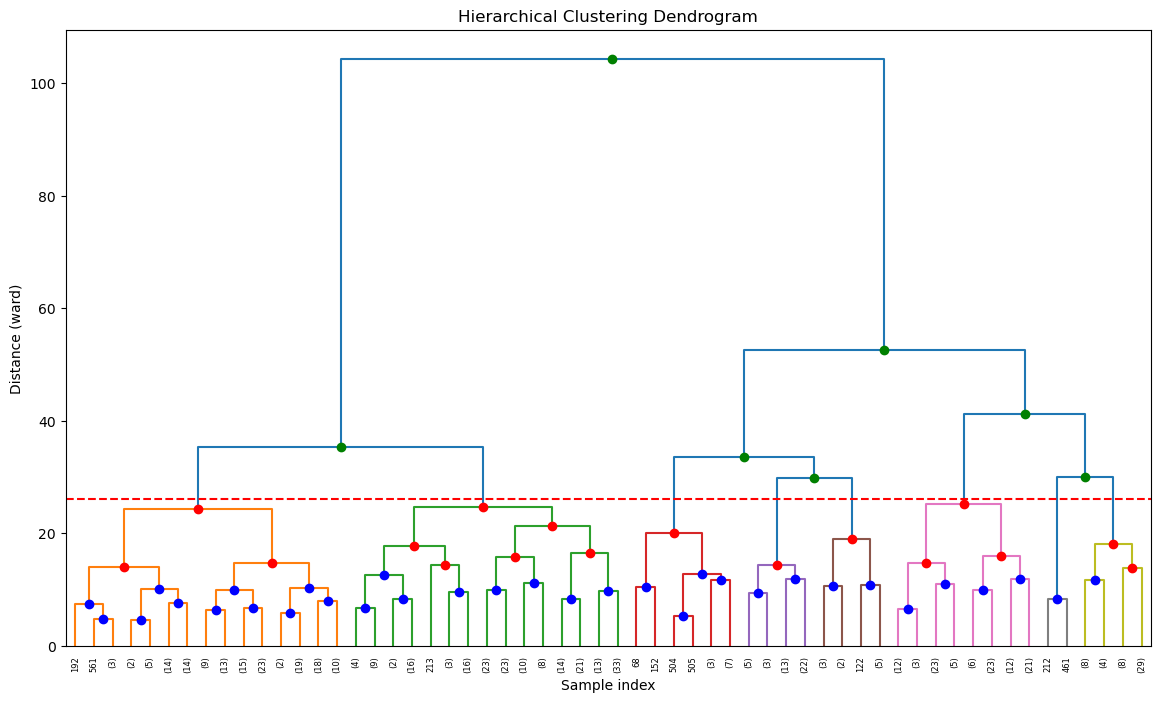

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(encoded_data.select_dtypes(include=['int64', 'float64','int32','float32']))


cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(scaled_data)

Z = linkage(scaled_data, 'ward')

def color_threshold(den, t):
    for i, d in enumerate(den['icoord']):
        x = 0.5 * sum(d[1:3])
        y = den['dcoord'][i][1]
        if y > t:
            plt.plot(x, y, 'go')
        elif y > t / 2:
            plt.plot(x, y, 'ro')
        else:
            plt.plot(x, y, 'bo')


threshold = 26  # adjust this based on your dataset

# Plot the dendrogram
plt.figure(figsize=(14, 8))
dendro = dendrogram(Z, color_threshold=threshold, truncate_mode='level', p=5)

# Apply the custom color function
color_threshold(dendro, threshold)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance (ward)')
plt.axhline(y=threshold, color='r', linestyle='--')

# Add annotations or adjust the aesthetics as needed
plt.show()

C:\Users\Julien Delaunay\AppData\Local\Temp\ipykernel_11972\1989600439.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dendro['leaves_color_list'], cmap='viridis', marker='o', edgecolor='k', s=50)


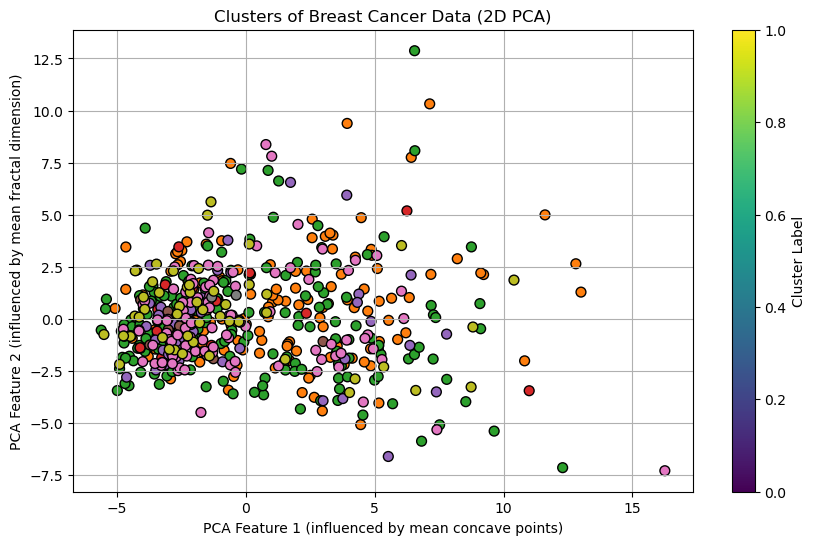

In [8]:
dendro = dendrogram(Z, color_threshold=threshold, no_plot=True)
# Plotting the clusters with named PCA features
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dendro['leaves_color_list'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Clusters of Breast Cancer Data (2D PCA)')
plt.xlabel(f'PCA Feature 1 (influenced by {most_significant_features[0]})')
plt.ylabel(f'PCA Feature 2 (influenced by {most_significant_features[1]})')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()

## Detect Anomaly

In [4]:
from sklearn.ensemble import IsolationForest 

model = IsolationForest(contamination=0.05, max_features=0.8, max_samples=0.8, n_estimators=2000, random_state=42) 
model.fit(scaled_data) 
#model.fit(components_df)
  
# Calculate the outlier scores for each point 
ir_scores = model.decision_function(scaled_data) 
#ir_scores = model.decision_function(components_df) 
  
# Identify the points with the highest outlier scores 
ir_outliers = np.where(ir_scores < 0)[0].tolist() #np.argwhere(ir_scores < np.percentile(ir_scores, 17))
ir_outliers


[0,
 3,
 9,
 12,
 42,
 68,
 71,
 78,
 82,
 108,
 122,
 151,
 152,
 180,
 190,
 192,
 212,
 213,
 258,
 265,
 290,
 314,
 352,
 368,
 461,
 503,
 504,
 505,
 567]

In [5]:
anomaly_array = [1 if x in ir_outliers else 0 for x in range(data.shape[0])]
data['anomaly'] = anomaly_array

### Box plot

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


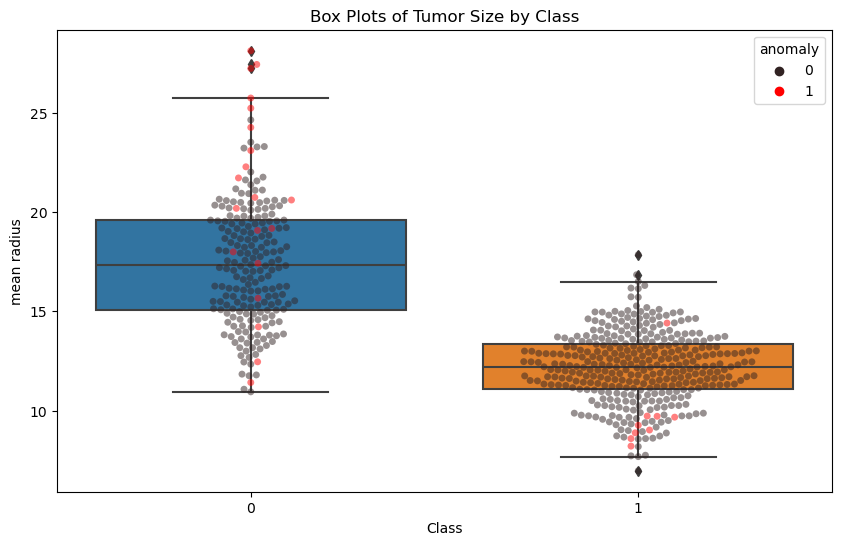

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


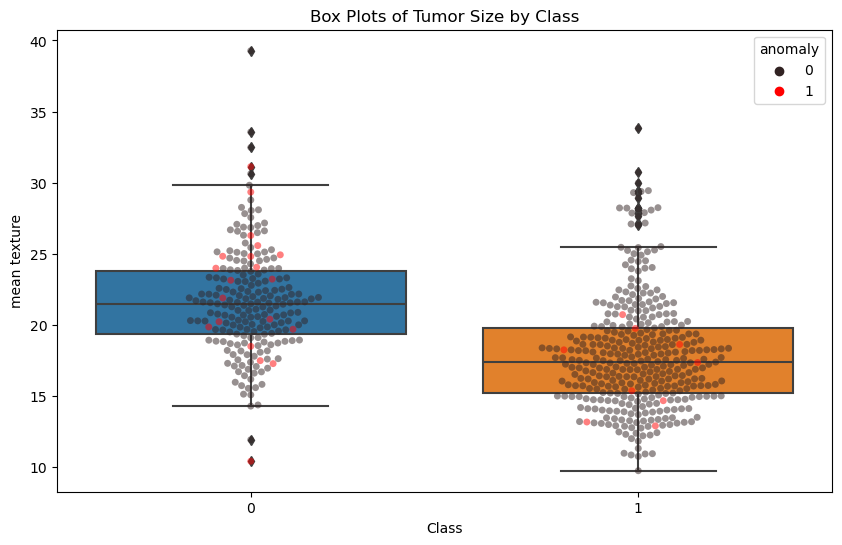

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


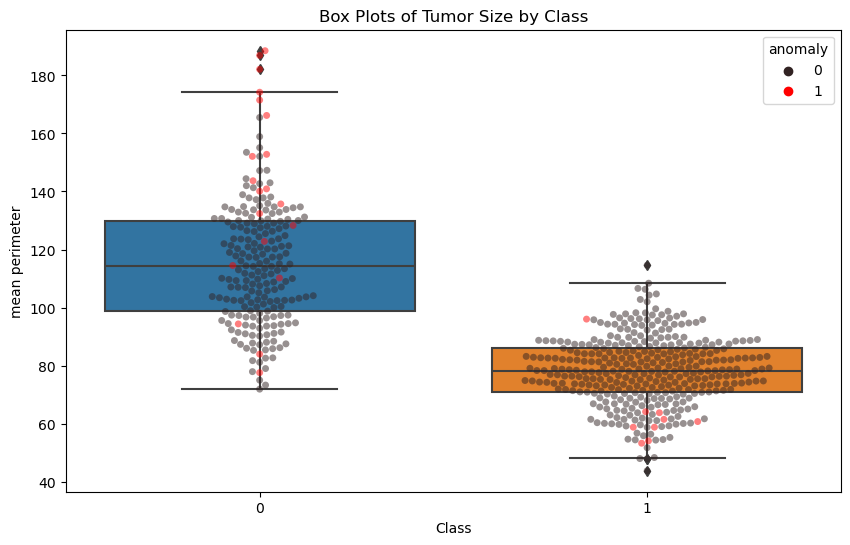

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


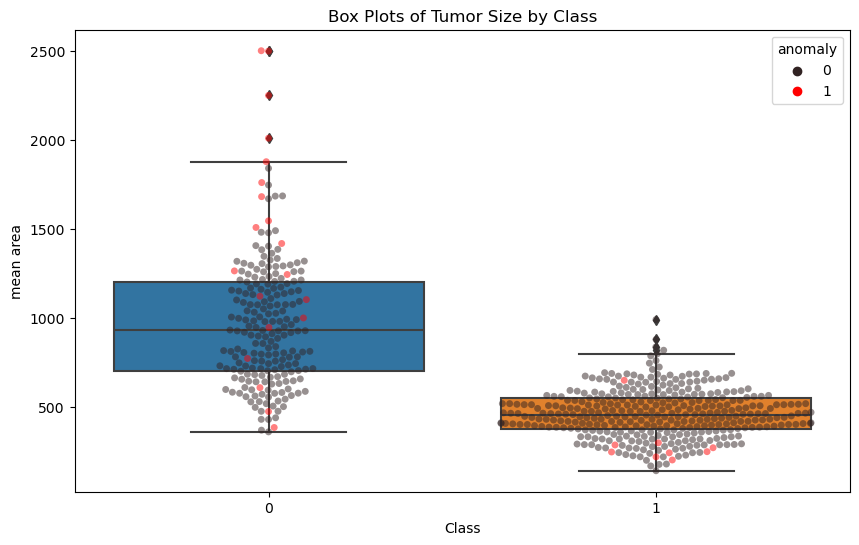

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


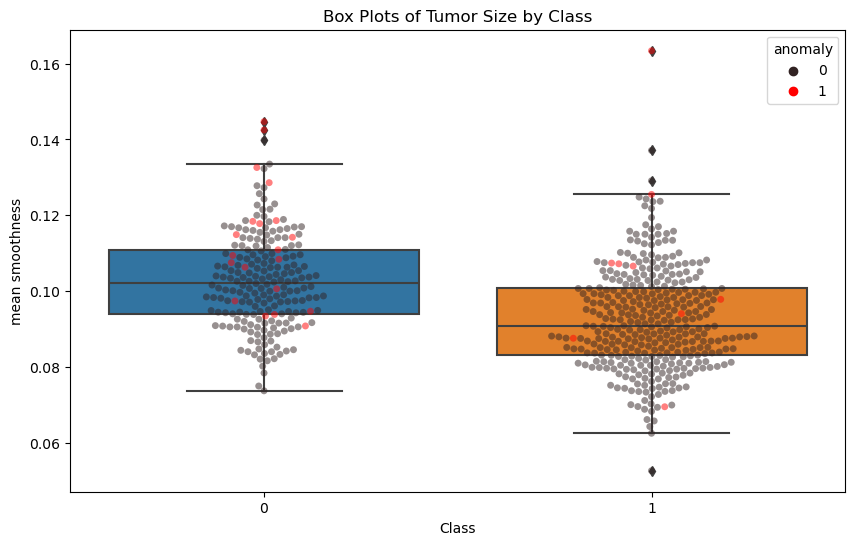

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


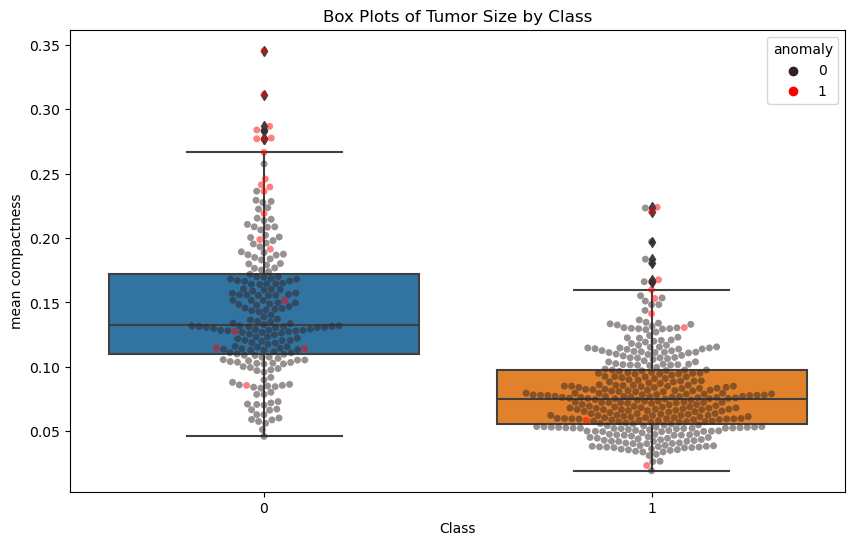

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


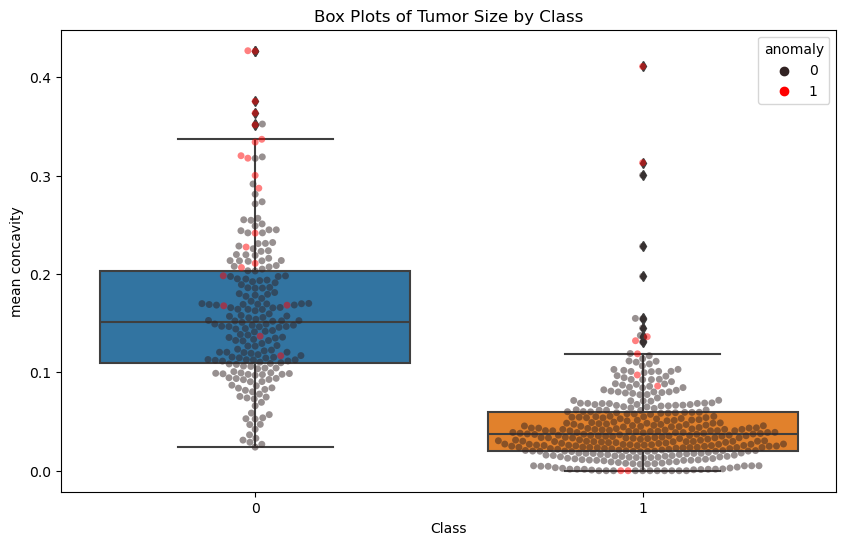

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


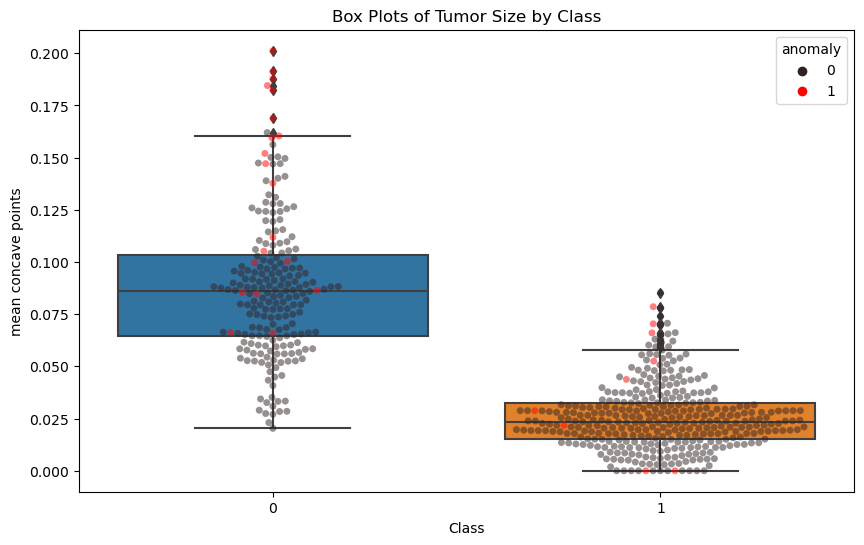

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


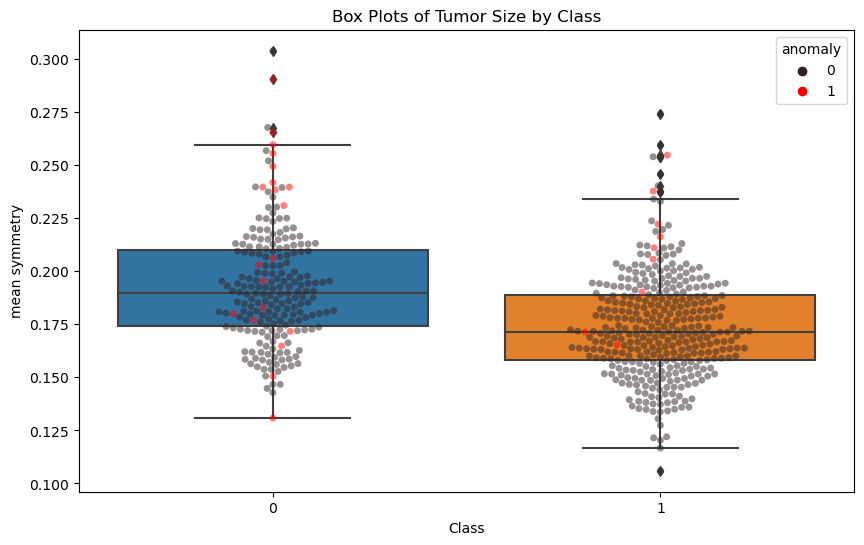

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


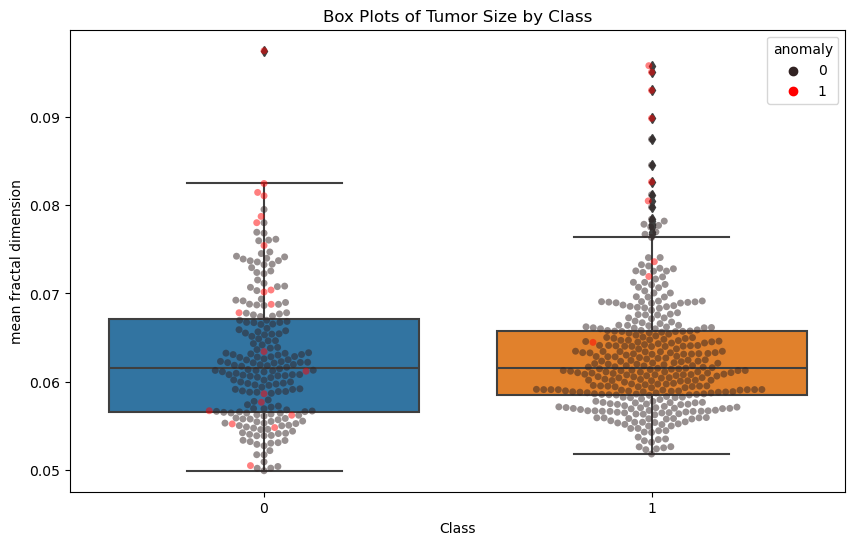

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.4% of the points cannot be placed; yo

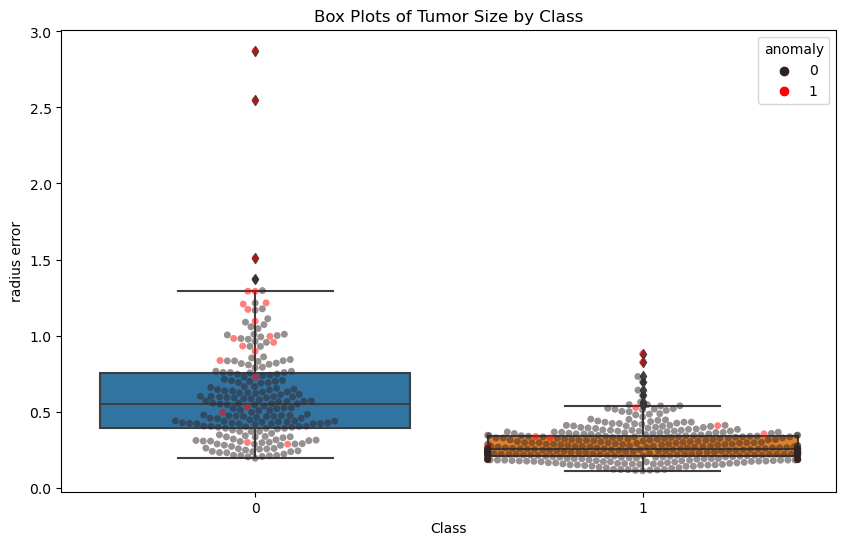

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


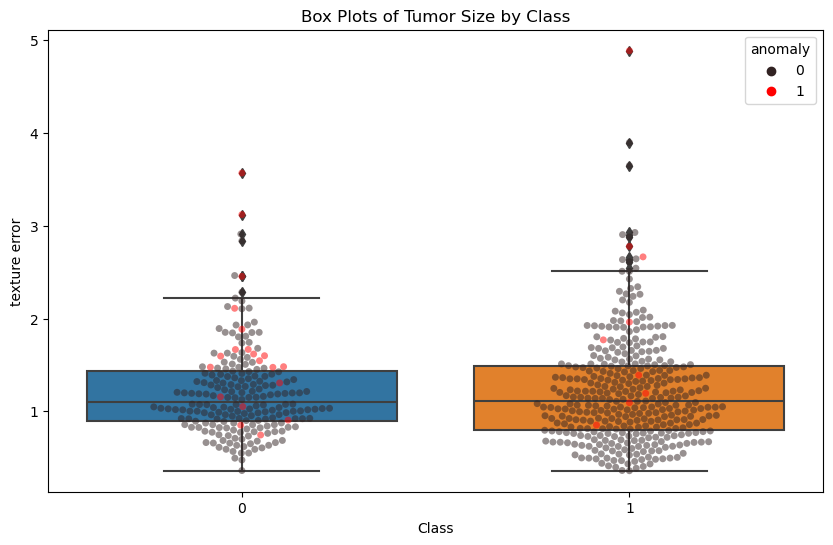

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.2% of the points cannot be placed; yo

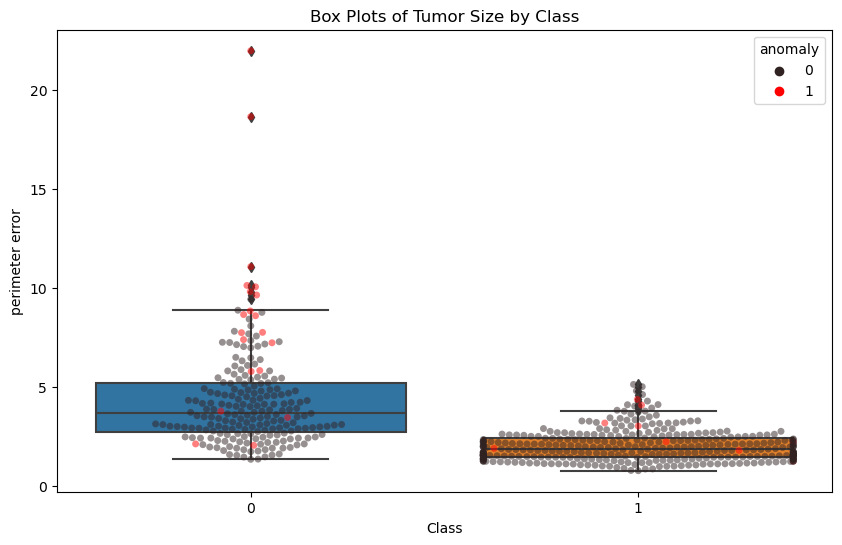

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.9% of the points cannot be placed; yo

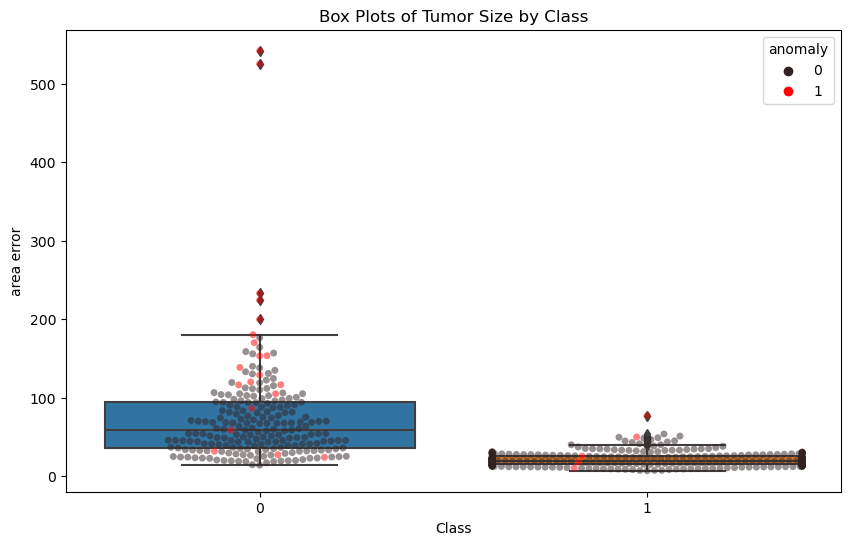

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


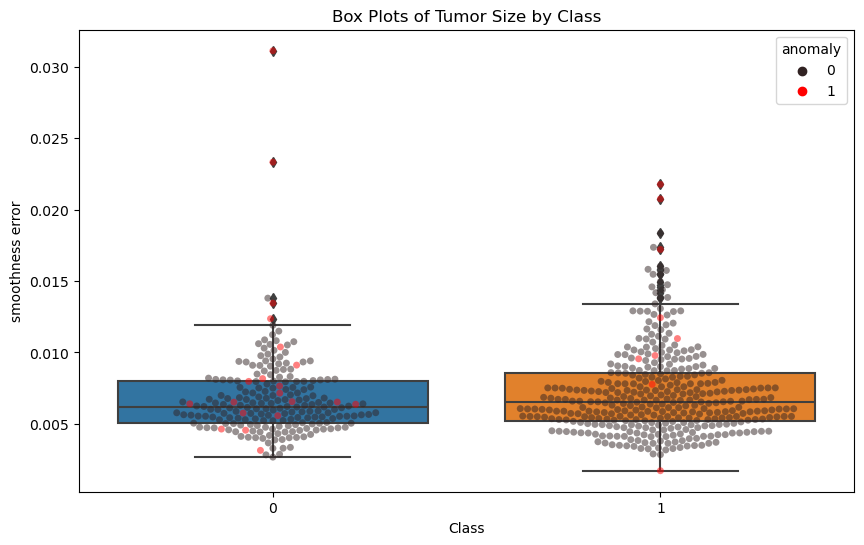

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


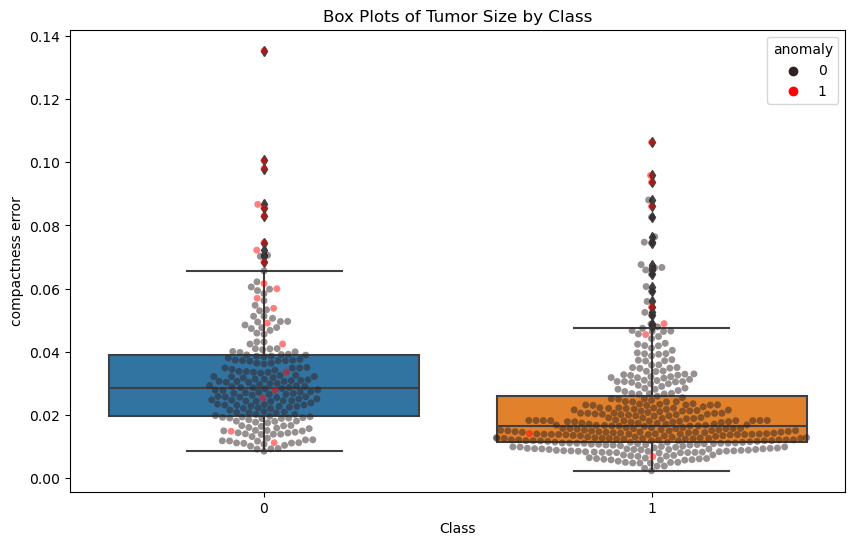

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.4% of the points cannot be placed; yo

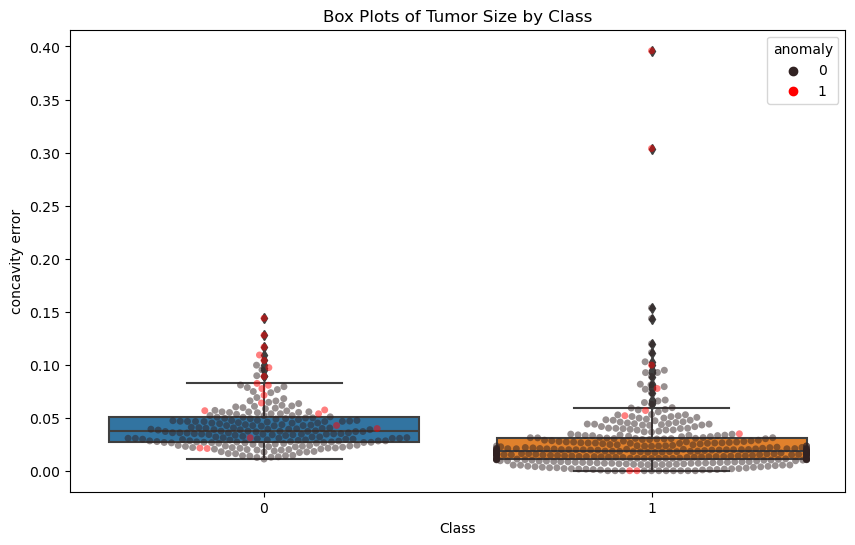

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


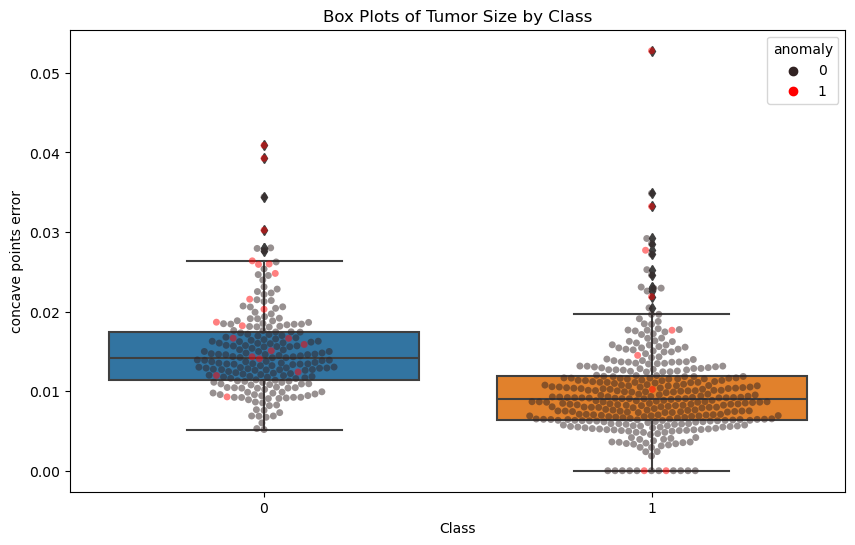

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


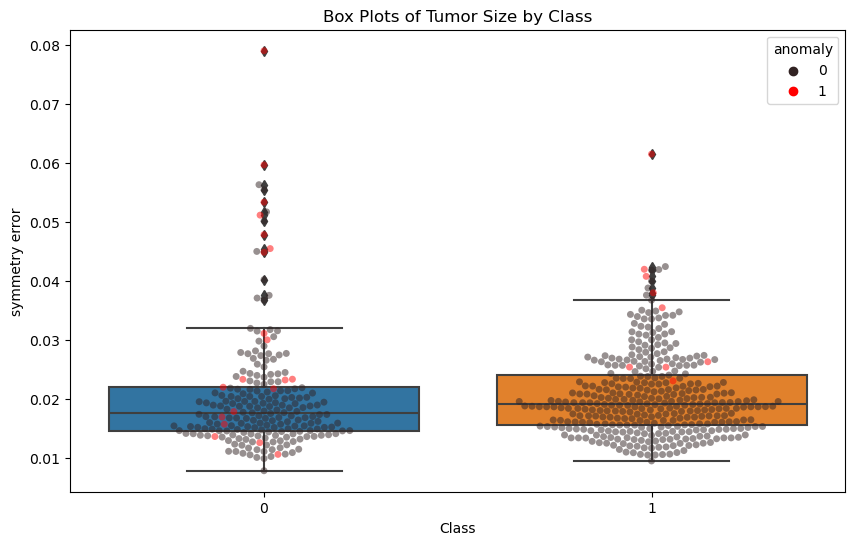

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.1% of the points cannot be placed; you

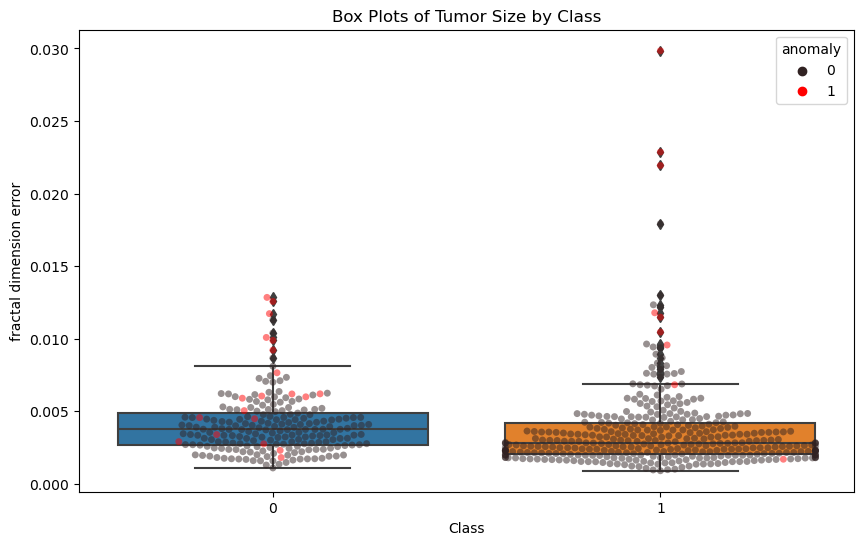

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


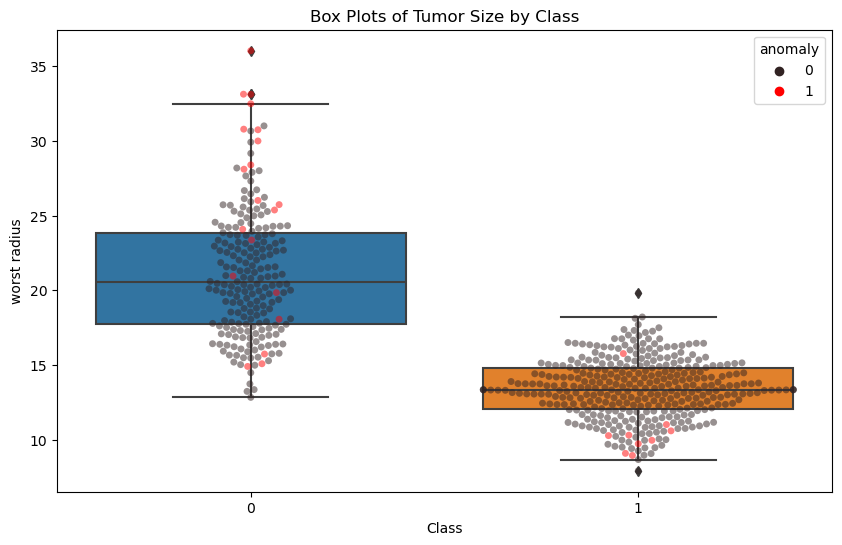

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


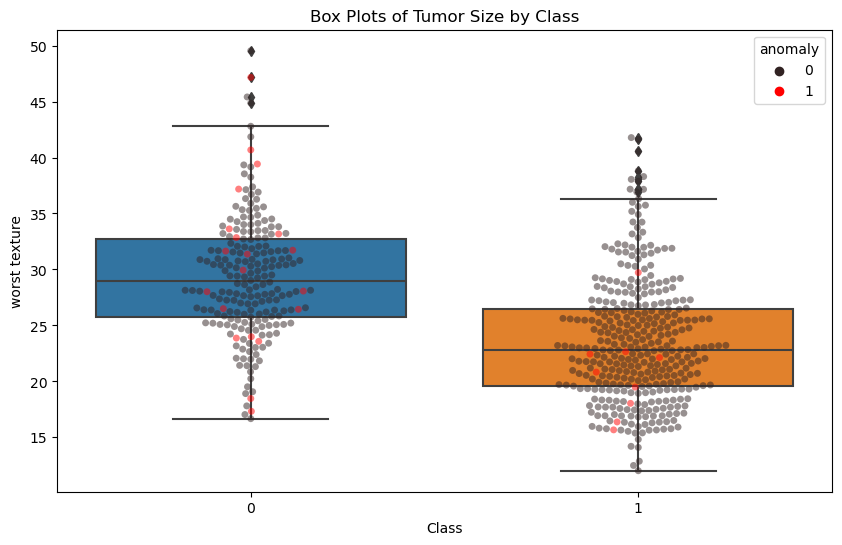

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


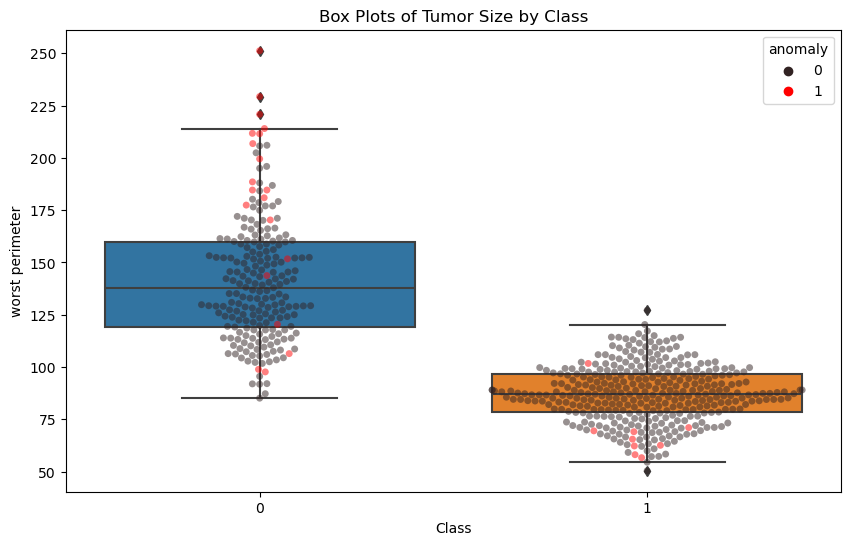

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.1% of the points cannot be placed; yo

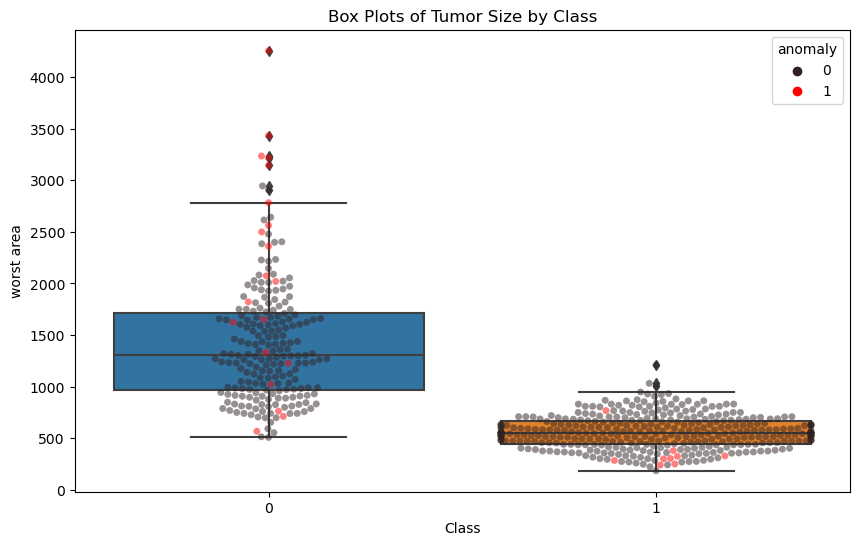

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


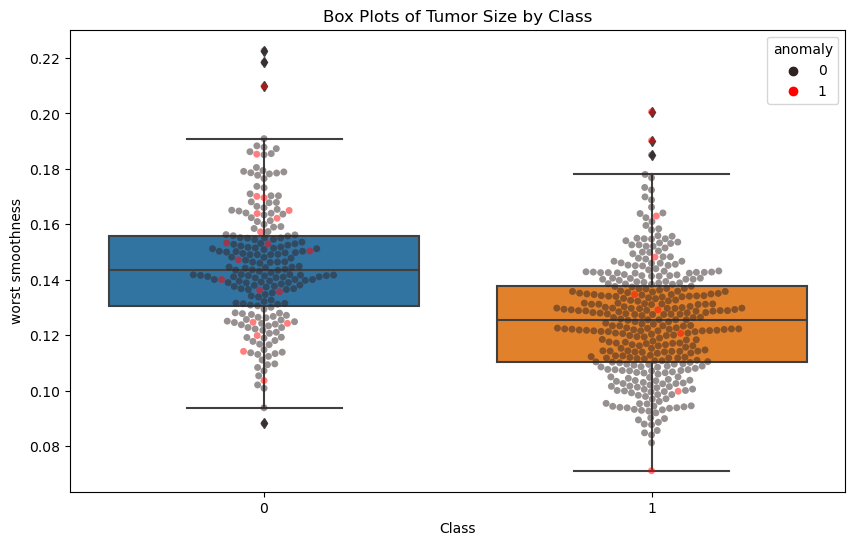

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


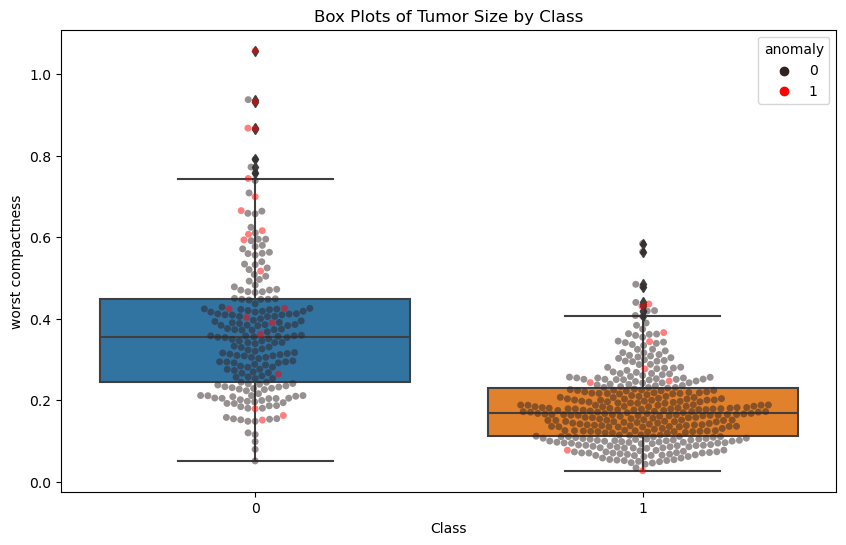

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


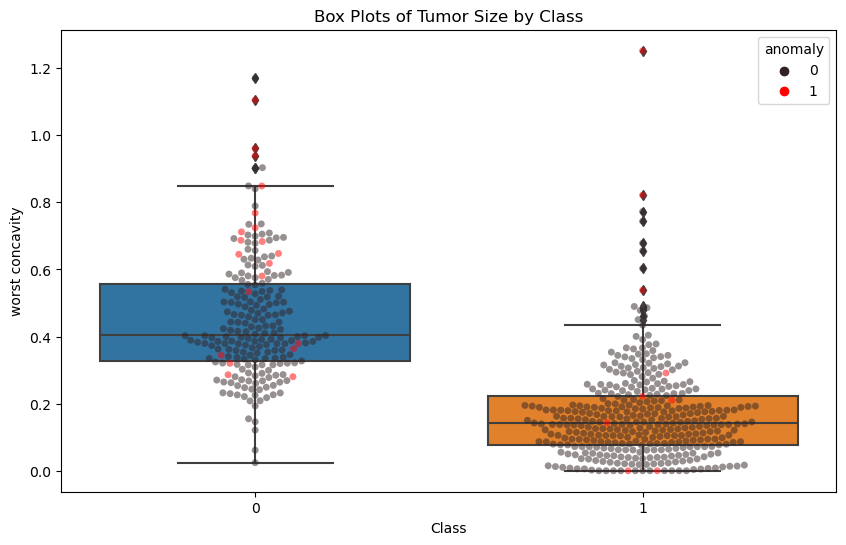

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


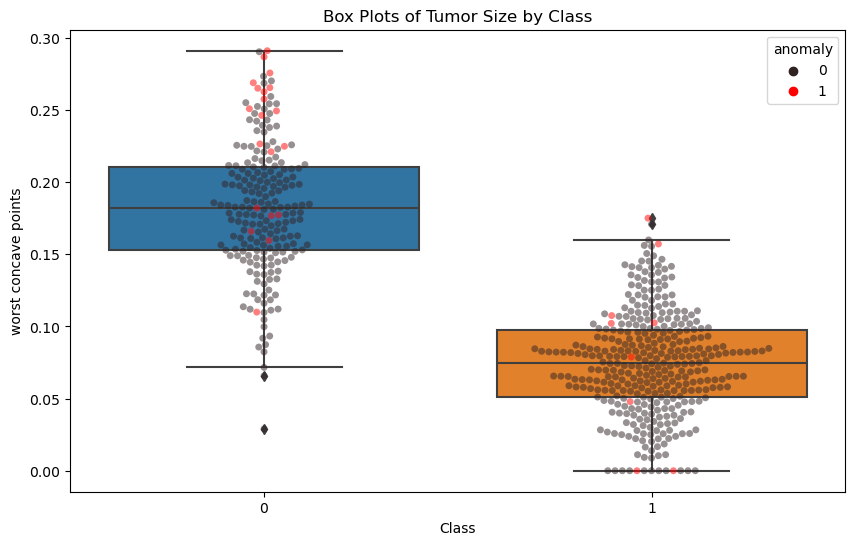

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


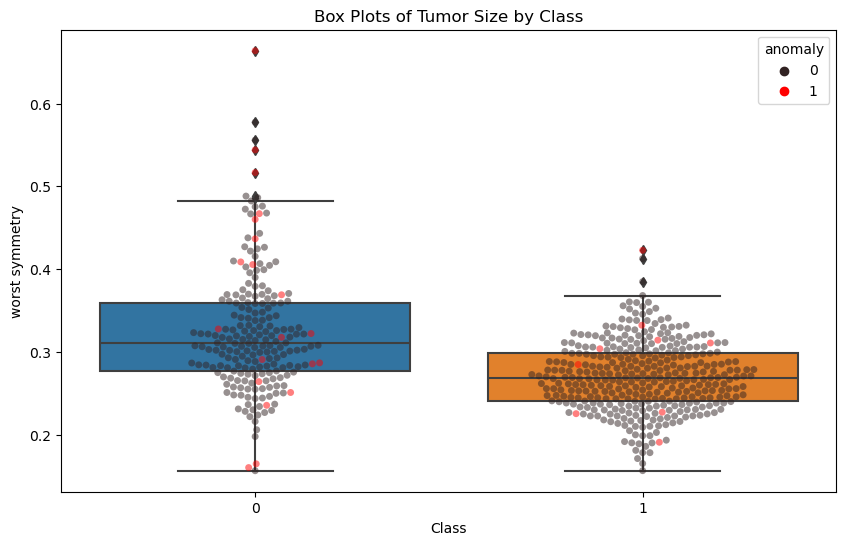

c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Julien Delaunay\.conda\envs\globalEHR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


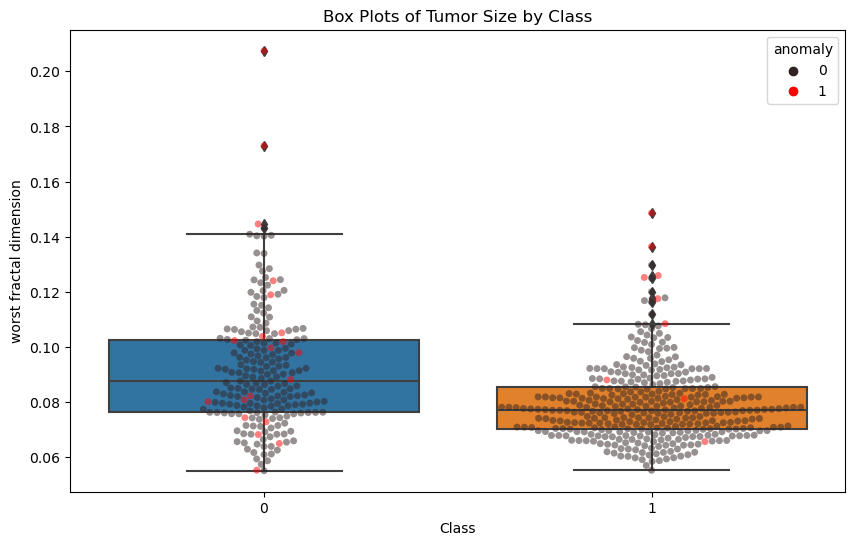

In [6]:
for y_label in data.columns[:-2]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y=y_label, data=data)
    sns.swarmplot(x='Class', y=y_label, data=data, color="red", hue='anomaly', alpha=0.5)

    plt.title('Box Plots of Tumor Size by Class')
    plt.xlabel('Class')
    plt.ylabel(y_label)
    plt.show()

### Distribution-Based Clustering

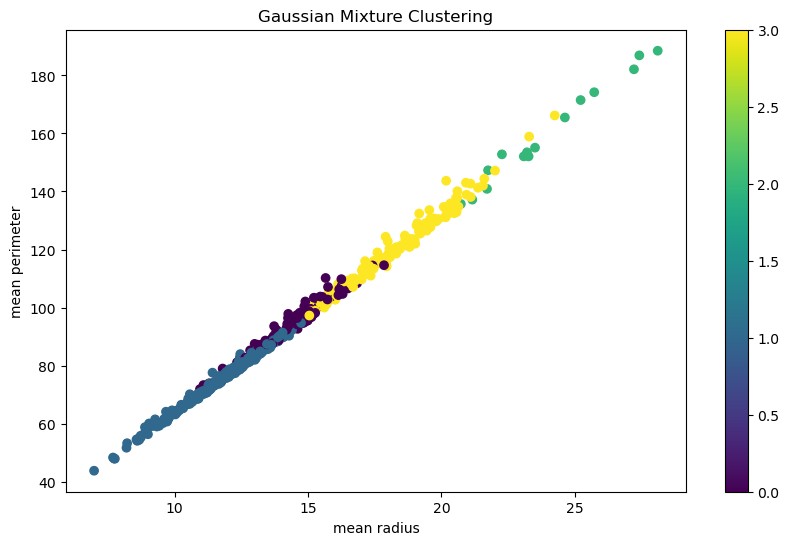

Cluster labels:  {0, 1, 2, 3}


In [7]:
feature_x, feature_y = 0, 2

# Create a Gaussian Mixture Model with an assumption about the number of components (clusters)
# The number of components needs to be chosen or estimated
gmm = GaussianMixture(n_components=4, random_state=42)

# Fit the model and predict the cluster assignments for each data point
gmm.fit(data)
cluster_labels = gmm.predict(data)

# Optionally, we can also obtain the probabilities that each data point belongs to each cluster
cluster_probs = gmm.predict_proba(data)

# Add the cluster labels as a column in the dataframe
data['Cluster_Labels'] = cluster_labels

# Visualize the clusters (if we have at least two features to plot)
# For demonstration, we'll assume the first two features are the most relevant
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data.iloc[:, feature_x], data.iloc[:, feature_y], c=data['Cluster_Labels'], cmap='viridis', label=data['Cluster_Labels'])
plt.title('Gaussian Mixture Clustering')
plt.xlabel(f'{data.columns[feature_x]}')
plt.ylabel(f'{data.columns[feature_y]}')
plt.colorbar(scatter)
plt.show()

# Now let's print the clusters
print("Cluster labels: ", set(cluster_labels))